In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 #uniformly distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.sin(3*X[:, 1])

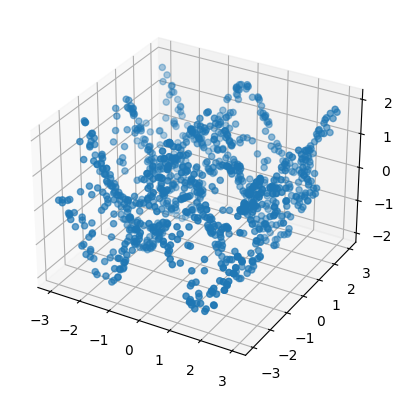

In [3]:
#Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)
# plt.show()

In [4]:
#Build model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [5]:
#Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [6]:
#Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs = 1000):
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    #Zero the parameter gradients
    optimizer.zero_grad()

    #Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    #Backward and optimize
    loss.backward()
    optimizer.step()

    #Save losses
    train_losses[it] = loss.item()

    if (it + 1) % 50 == 0:
      print(f'Epoch {it + 1}/{epochs}, Train Loss: {loss.item():.4f}')
  return train_losses
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.6065
Epoch 100/1000, Train Loss: 0.1528
Epoch 150/1000, Train Loss: 0.0637
Epoch 200/1000, Train Loss: 0.0504
Epoch 250/1000, Train Loss: 0.0472
Epoch 300/1000, Train Loss: 0.0442
Epoch 350/1000, Train Loss: 0.0394
Epoch 400/1000, Train Loss: 0.0378
Epoch 450/1000, Train Loss: 0.0303
Epoch 500/1000, Train Loss: 0.0253
Epoch 550/1000, Train Loss: 0.0205
Epoch 600/1000, Train Loss: 0.0149
Epoch 650/1000, Train Loss: 0.0141
Epoch 700/1000, Train Loss: 0.0081
Epoch 750/1000, Train Loss: 0.0106
Epoch 800/1000, Train Loss: 0.0045
Epoch 850/1000, Train Loss: 0.0037
Epoch 900/1000, Train Loss: 0.0049
Epoch 950/1000, Train Loss: 0.0041
Epoch 1000/1000, Train Loss: 0.0027


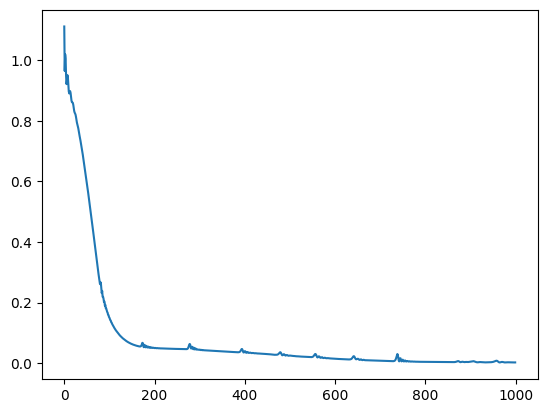

In [7]:
plt.plot(train_losses)

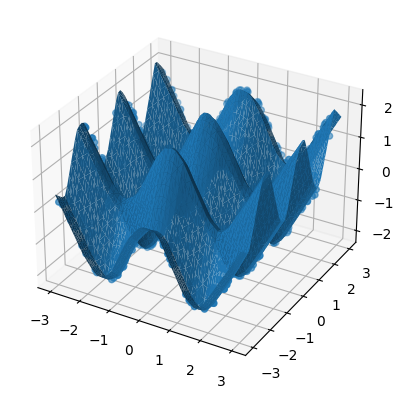

In [8]:
#Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth = 0.2, antialiased =  True)
  plt.show()